# Einleitung
...

## Kaptiel 1: Insights
### Im ersten Kapitel geht es zunächst darum mit anhand der unbearbeiteten Daten festzustellen welche features (Spalten) für die spätere Vorhersage wichtig sind und welche entfernt werden können. Um die Analyse möglichst nicht zu verfälschen werd das Datacleaning erst im Anschluss durchgeführt

In [1]:
# Zunächst werden die benötigten Bibliotheken importiert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Anschließend werden die Daten eingelesen und in Dataframes gespeichert

df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")

/tmp/ipykernel_25111/654506865.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("train.csv")


In [3]:


# Die Zeilen werden nach ID zusammengefasst, die Summe der Werte werden gebildet und in einer neuen Tabelle gespeichert um doppelte Einträge zu vermeiden
df3 = df2.groupby("Store").sum()

df3.head()

/tmp/ipykernel_25111/3694157191.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2.groupby("Store").sum()


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3766,3716854,440523,781,360,193
2,3766,3883858,457855,784,360,167
3,3766,5408261,584310,779,360,170
4,3766,7556507,1036254,784,360,173
5,3766,3642818,418588,779,360,172


<Axes: >

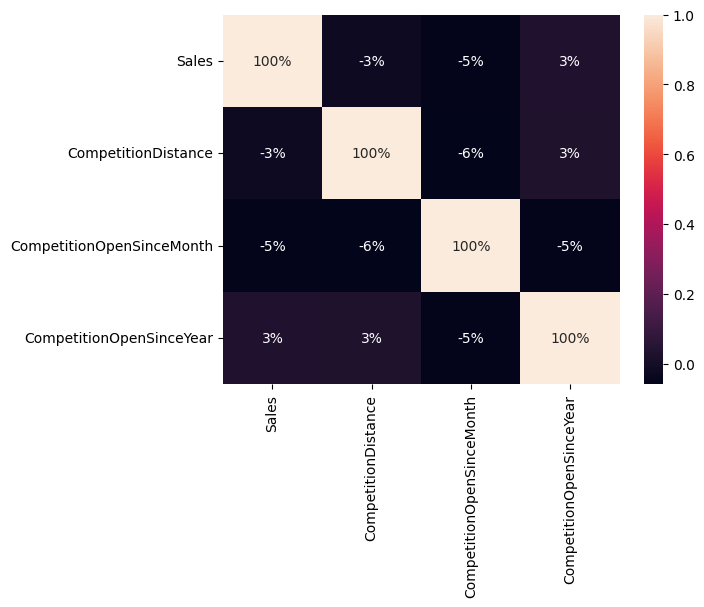

In [4]:
# Das eben zusammengefasste Dataframe wird nun mit dem ersten Dataframe zusammengeführt um den Einfluss der Wettbewerber (Competition) auf die Sales zu bestimmen )
df_merged = pd.merge(df1, df3, on="Store")
df_merged.head()

#
#die Korrelation zwischen den Spalten Sales und CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear wird in einer Heatmap dargestellt
sns.heatmap(df_merged[["Sales", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].corr(), annot=True, fmt=".0%")

### Als nächstes wird ein genauer Blick auf den Zusammenhang zwischen Sales und dem Wochentag geworfen
#### Dafür wird ein neues Dataframe mit dem Namen df_Date erstellt, hier werden anders als bei df_merged die Store_IDs nicht zusammengefasst um den unterschied zwischen den Wochentagen hervorheben zu können

In [5]:
df_date = pd.merge(df1, df2, on="Store")
df_date.head(5) 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

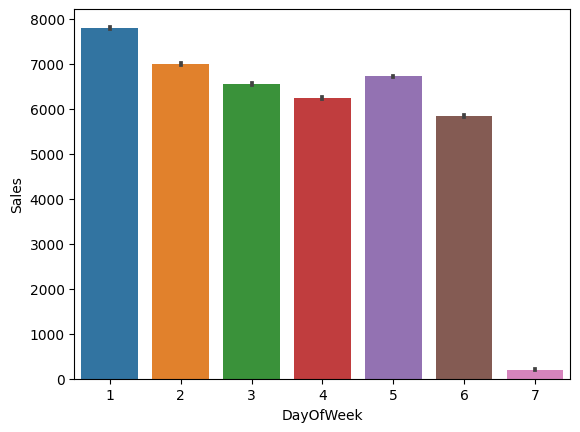

In [6]:
# Die Sales werden nach Wochentag gruppiert und in einem Säulendiagramm dargestellt
sns.barplot(x="DayOfWeek", y="Sales", data=df_date)


#### Anhand des Graphen kann man erkennen, dass Montags und Freitags in der Regel die höchsten Umsätze generiert werden

<Axes: >

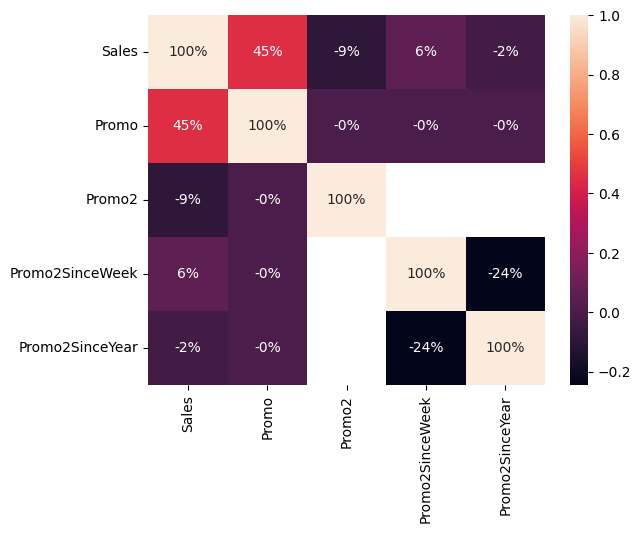

In [7]:


# Es wird eine Heatmap erstellt, um die Korrelation zwischen Sales und Promo, Promo2, Promo2SinceWeek und Promo2SinceYear zu bestimmen
sns.heatmap(df_date[["Sales", "Promo", "Promo2", "Promo2SinceWeek", "Promo2SinceYear"]].corr(), annot=True, fmt=".0%")

### Die Spalten "Promo2" "Promo2SinceWeek" und "Promo2SinceYear" werden entfernt, da diese zu wenig Einfluss auf die Sales haben und lediglich die Dauer der Promotion anzeigen, während der Fakt das eine Promotion stattfindet bereits durch die Spalte Promo geklärt wird, darüber hinaus fehlen 50% der Datensätze, was eine Auswertung erschwert.

## Kapitel 2: Data Cleaning
### Nachdem in den Insights die Daten gesichtet und inital nach wichtigkeit Bewertet wurden, geht es nun beim Datacleaning darum die Daten so aufzubereiten, dass die KI-Modelle später mit ihnen arbeiten können und vorhersagen treffen können 

#### Es wird nocheinmal ein Blick auf die Daten geworfen nun mit dem Ziel sie mittels Datacleaning Methoden für die KI-Verfahren Nuztbar zu machen

In [8]:
# kurzer Überblick über die Daten in dem Dataframe df1
print(df1.shape[0])
print(df1.info())
df1.head(10)

1115
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [9]:
# Ein kurzer Überblick über die Daten in dem Dataframe df2

print(df2.shape[0])
print(df2.info())
df2.head(10)

1017209
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


## Spalten entfernen
Da wir durch eine Korrelation herausgefunden haben, dass die drei Spalten "CompetitionDistance", "CompetitionOpenSinceMonth" und "CompetitionOpenSinceYear" nur geringfügig mit den "Sales" zusammenhängt, werden diese aus dem Datenframe entfernt.

In [10]:

# Die Spalten CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear werden entfernt
df1.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

print(df1.info())
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            1115 non-null   int64  
 1   StoreType        1115 non-null   object 
 2   Assortment       1115 non-null   object 
 3   Promo2           1115 non-null   int64  
 4   Promo2SinceWeek  571 non-null    float64
 5   Promo2SinceYear  571 non-null    float64
 6   PromoInterval    571 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 61.1+ KB
None


,Store,StoreType,Assortment,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,0,NaN,NaN,NaN
1,2,a,a,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,0,NaN,NaN,NaN
4,5,a,a,0,NaN,NaN,NaN
5,6,a,a,0,NaN,NaN,NaN
6,7,a,c,0,NaN,NaN,NaN
7,8,a,a,0,NaN,NaN,NaN
8,9,a,c,0,NaN,NaN,NaN
9,10,a,a,0,NaN,NaN,NaN


In [11]:
# Da das df1 verändert wurde wird es nun erneut mit df2 in einem neuen df gemerged

df_merged2 = pd.merge(df2, df1, on='Store', how='left')

print(df_merged2.info())
df_merged2.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Store            1017209 non-null  int64  
 1   DayOfWeek        1017209 non-null  int64  
 2   Date             1017209 non-null  object 
 3   Sales            1017209 non-null  int64  
 4   Customers        1017209 non-null  int64  
 5   Open             1017209 non-null  int64  
 6   Promo            1017209 non-null  int64  
 7   StateHoliday     1017209 non-null  object 
 8   SchoolHoliday    1017209 non-null  int64  
 9   StoreType        1017209 non-null  object 
 10  Assortment       1017209 non-null  object 
 11  Promo2           1017209 non-null  int64  
 12  Promo2SinceWeek  509178 non-null   float64
 13  Promo2SinceYear  509178 non-null   float64
 14  PromoInterval    509178 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 124.2+ MB
None


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,0,NaN,NaN,NaN


In [12]:
# Die Spalte Date wird in Jahr, Monat und Tag aufgeteilt
df_merged2['Date'] = pd.to_datetime(df_merged2['Date'])
df_merged2['Year'] = df_merged2['Date'].dt.year
df_merged2['Month'] = df_merged2['Date'].dt.month
df_merged2['Day'] = df_merged2['Date'].dt.day

df_merged2.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,0,NaN,NaN,NaN,2015,7,31
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,0,NaN,NaN,NaN,2015,7,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,0,NaN,NaN,NaN,2015,7,31
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,0,NaN,NaN,NaN,2015,7,31
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,0,NaN,NaN,NaN,2015,7,31
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,0,NaN,NaN,NaN,2015,7,31


## Promo 2 Spalten werden entfernt
Die Spalten "Promo2" "Promo2SinceWeek", "Promo2SinceYear" und "PromoInterval" werden entfernt, da diese zu wenig Einfluss auf die Sales haben und lediglich die Dauer der Promotion anzeigen, während der Fakt das eine Promotion stattfindet bereits durch die Spalte Promo geklärt wird, darüber hinaus fehlen 50% der Datensätze, was eine Auswertung erschwert.

In [13]:
df_merged2.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True)

print(df_merged2.info())
df_merged2.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   StoreType      1017209 non-null  object        
 10  Assortment     1017209 non-null  object        
 11  Year           1017209 non-null  int64         
 12  Month          1017209 non-null  int64         
 13  Day            1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), o

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,2015,7,31
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,2015,7,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,2015,7,31
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,2015,7,31
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2015,7,31
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,2015,7,31


In [14]:
# Die Spalte Date wird entfernt
df_merged2.drop(['Date'], axis=1, inplace=True)
df_merged2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Year,Month,Day
0,1,5,5263,555,1,1,0,1,c,a,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,2015,7,31


In [15]:
# show unique values of StateHoliday
df_merged2['StateHoliday'].unique()


array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
# replace 0 with '0'
df_merged2['StateHoliday'] = df_merged2['StateHoliday'].replace(0, '0')

# show unique values of StateHoliday
print(df_merged2['StateHoliday'].unique())
print(df_merged2['StoreType'].unique())
print(df_merged2['Assortment'].unique())

['0' 'a' 'b' 'c']
['c' 'a' 'd' 'b']
['a' 'c' 'b']


In [17]:
# Die Spalten StateHoliday, StoreType, Assortment werden in numerische Werte umgewandelt mittels Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_merged2['StateHoliday'] = le.fit_transform(df_merged2['StateHoliday'])
df_merged2['StoreType'] = le.fit_transform(df_merged2['StoreType'])
df_merged2['Assortment'] = le.fit_transform(df_merged2['Assortment'])

print(df_merged2['StateHoliday'].unique())
print(df_merged2['StoreType'].unique())
print(df_merged2['Assortment'].unique())


print(df_merged2.info())

[0 1 2 3]
[2 0 3 1]
[0 2 1]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1017209 non-null  int64
 1   DayOfWeek      1017209 non-null  int64
 2   Sales          1017209 non-null  int64
 3   Customers      1017209 non-null  int64
 4   Open           1017209 non-null  int64
 5   Promo          1017209 non-null  int64
 6   StateHoliday   1017209 non-null  int64
 7   SchoolHoliday  1017209 non-null  int64
 8   StoreType      1017209 non-null  int64
 9   Assortment     1017209 non-null  int64
 10  Year           1017209 non-null  int64
 11  Month          1017209 non-null  int64
 12  Day            1017209 non-null  int64
dtypes: int64(13)
memory usage: 108.6 MB
None
